In [68]:
import openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Data

## Getting Data

In [69]:
dataset = openml.datasets.get_dataset(43611)
X, y, _, attribute_names = dataset.get_data(target='class')
data = pd.concat([X, y], axis=1)

data

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


## Data Preparation

In [70]:
data.dropna(inplace=True)

## Data Split


In [71]:
from sklearn.model_selection import train_test_split

y = data['class']
X = data.drop('class', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y ,random_state=42)

x_train

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis
204,1217264,1,1,1,1,2,1.0,3,1,1
373,521441,5,1,1,2,2,1.0,2,1,1
496,1181567,1,1,1,1,1,1.0,1,1,1
127,1177027,3,1,1,1,2,1.0,3,1,1
613,1016634,2,3,1,1,2,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
500,1224565,6,1,1,1,2,1.0,3,1,1
268,324427,10,8,8,2,3,4.0,8,7,8
378,657753,3,1,1,4,3,1.0,2,2,1
639,1277792,5,1,1,3,2,1.0,1,1,1


## Visualisation

### Scatter Matrix

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='thickness', ylabel='id'>,
        <Axes: xlabel='size', ylabel='id'>,
        <Axes: xlabel='shape', ylabel='id'>,
        <Axes: xlabel='adhesion', ylabel='id'>,
        <Axes: xlabel='single', ylabel='id'>,
        <Axes: xlabel='nuclei', ylabel='id'>,
        <Axes: xlabel='chromatin', ylabel='id'>,
        <Axes: xlabel='nucleoli', ylabel='id'>,
        <Axes: xlabel='mitosis', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='thickness'>,
        <Axes: xlabel='thickness', ylabel='thickness'>,
        <Axes: xlabel='size', ylabel='thickness'>,
        <Axes: xlabel='shape', ylabel='thickness'>,
        <Axes: xlabel='adhesion', ylabel='thickness'>,
        <Axes: xlabel='single', ylabel='thickness'>,
        <Axes: xlabel='nuclei', ylabel='thickness'>,
        <Axes: xlabel='chromatin', ylabel='thickness'>,
        <Axes: xlabel='nucleoli', ylabel='thickness'>,
        <Axes: xlabel='mitosis', ylabel='thickness'>],


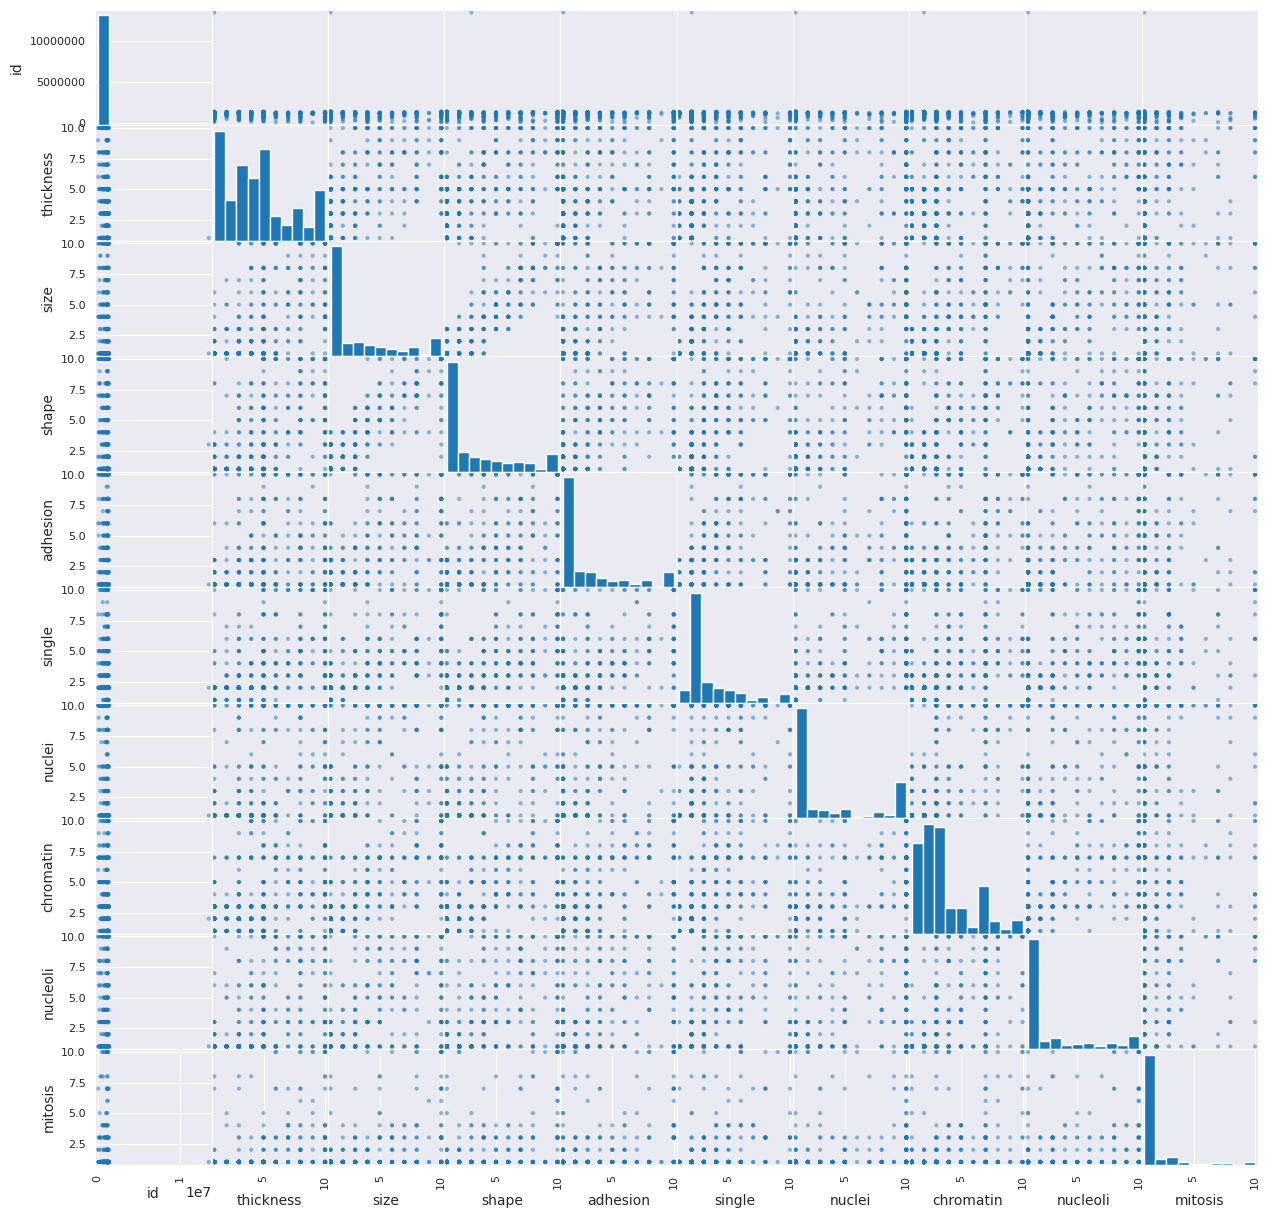

In [72]:
from pandas.plotting import scatter_matrix
scatter_matrix(x_train, figsize=(15,15))

### Correlation Matrix

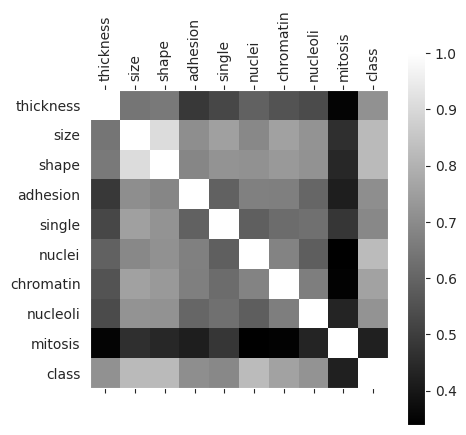

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitosis,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


In [73]:
names = data.columns[1:]
corr_mtx = (data[names]).corr(method='pearson')
plt.matshow(corr_mtx, cmap="grey")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

corr_mtx

# Metric Function

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00       191

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546



{'accuracy': 1.0, 'roc_score': 1.0}

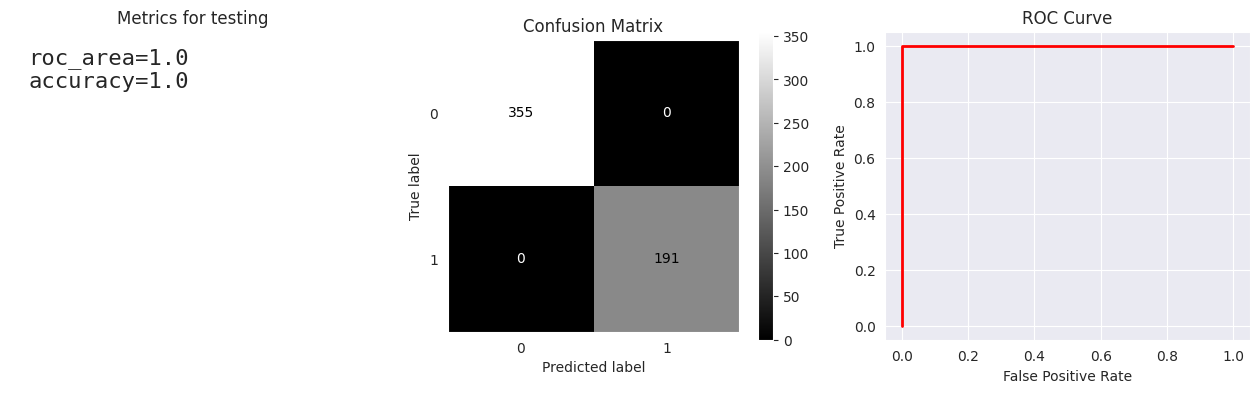

In [74]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, \
    roc_curve, classification_report


def metrics(preds:np.ndarray, probs:np.ndarray, lables:np.ndarray, method:str):
    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, probs)
    roc_area = roc_auc_score(lables, probs)
    accuracy = accuracy_score(lables, preds)

    print(classification_report(lables, preds))

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix.grid(False)
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}


metrics(y_train,y_train,y_train, "testing")

# Training with Stratified K-Folds

In [75]:
import time
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

def selected_features(selector):
    mask = selector.get_support()
    selected_names = x_train.columns[mask]
    return list(selected_names)


def optimize_train_and_judge(model_class, objective_fn, trails=100):
    global x_train, y_train, x_test, y_test

    study = optuna.create_study(direction="maximize")

    start = time.time()
    study.optimize(objective_fn, n_trials=trails, show_progress_bar=True)
    stop = time.time()


    pipe = Pipeline([('scaler',StandardScaler()),('features_selector', SelectKBest()) ,('classifier', model_class())])
    pipe.set_params(**study.best_params)
    pipe.fit(x_train, y_train)

    ## Metrics
    preds = pipe.predict(x_test)
    probs = pipe.predict_proba(x_test)[:, 1]
    metrics(preds, probs, y_test, "testing")

    selector = pipe.named_steps['features_selector']
    names_selected = selected_features(selector)
    features_shape = [x_test.shape[0], len(names_selected)]
    print(f"Selected features: {names_selected}")
    print(f"Optimize time: {stop-start}")

    return pipe


# Model Optmalization and Metrics

## Logistic regression

[I 2025-11-23 22:59:48,577] A new study created in memory with name: no-name-5455f7be-298b-472f-82ee-230c289de7d9


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-11-23 22:59:48,793] Trial 0 finished with value: -0.045754795663052544 and parameters: {'features_selector__k': 3, 'classifier__C': 4.239282042992133, 'classifier__solver': 'lbfgs', 'classifier__max_iter': 180}. Best is trial 0 with value: -0.045754795663052544.
[I 2025-11-23 22:59:48,828] Trial 1 finished with value: -0.09519599666388658 and parameters: {'features_selector__k': 1, 'classifier__C': 38.524326650856686, 'classifier__solver': 'liblinear', 'classifier__max_iter': 148}. Best is trial 0 with value: -0.045754795663052544.
[I 2025-11-23 22:59:48,858] Trial 2 finished with value: -0.036630525437864894 and parameters: {'features_selector__k': 6, 'classifier__C': 0.05417948966304311, 'classifier__solver': 'saga', 'classifier__max_iter': 146}. Best is trial 2 with value: -0.036630525437864894.
[I 2025-11-23 22:59:48,891] Trial 3 finished with value: -0.05678065054211843 and parameters: {'features_selector__k': 7, 'classifier__C': 0.004419628359954645, 'classifier__solver':

/home/franio/Desktop/Uczenie_maszynowe/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2025-11-23 22:59:49,017] Trial 7 finished with value: -0.04395329441201001 and parameters: {'features_selector__k': 2, 'classifier__C': 1.0734451556663842, 'classifier__solver': 'saga', 'classifier__max_iter': 178}. Best is trial 2 with value: -0.036630525437864894.
[I 2025-11-23 22:59:49,068] Trial 8 finished with value: -0.029291075896580487 and parameters: {'features_selector__k': 7, 'classifier__C': 13.122972528034971, 'classifier__solver': 'saga', 'classifier__max_iter': 126}. Best is trial 8 with value: -0.029291075896580487.
[I 2025-11-23 22:59:49,102] Trial 9 finished with value: -0.029291075896580487 and parameters: {'features_selector__k': 9, 'classifier__C': 0.0012243806784159124, 'classifier__solver': 'liblinear', 'classifier__max_iter': 155}. Best is trial 8 with value: -0.029291075896580487.
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        89
           1       0.92      0.98      0.95        48

    accuracy    

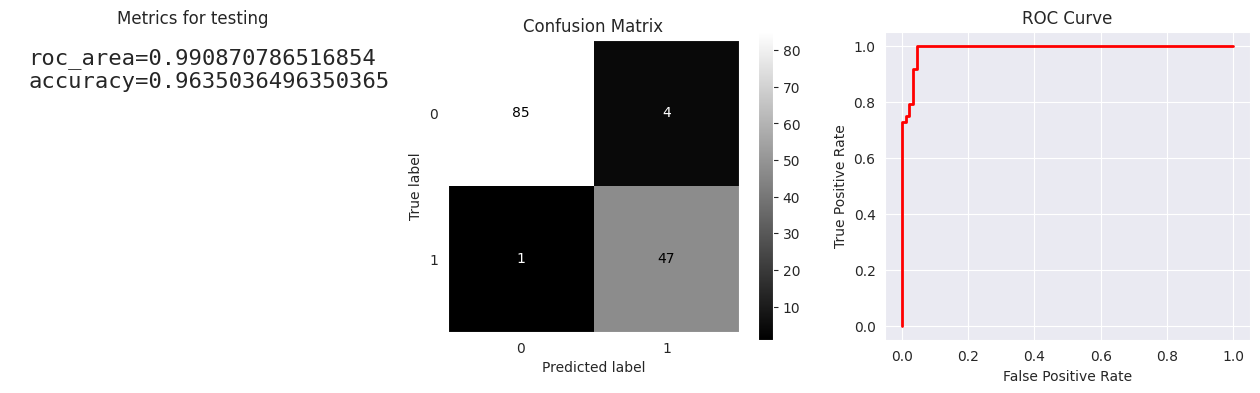

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif

def objective_logistic(trial):
    ## Features Selector
    selector_k = trial.suggest_int('features_selector__k', 1, 9)

    ## Classifier
    C = trial.suggest_float('classifier__C', 1e-3, 1e2, log=True)
    solver = trial.suggest_categorical('classifier__solver', ['lbfgs', 'liblinear', 'saga'])
    max_iter = trial.suggest_int('classifier__max_iter', 100, 200)


    pipe = Pipeline([('scaler', StandardScaler()),('features_selector', SelectKBest(k=selector_k, score_func=f_classif)) ,
                     ('classifier', LogisticRegression(C=C, solver=solver, max_iter=max_iter))])
    pipe.fit(x_train, y_train)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(pipe, x_train, y_train, cv=cv, scoring= 'neg_mean_squared_error').mean()

    return score


logistic_model = optimize_train_and_judge(LogisticRegression, objective_logistic, trails=10)

## KNN Classifier

[I 2025-11-23 22:59:49,426] A new study created in memory with name: no-name-82f8c8ab-d72a-43ef-9fbe-134251667030


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-11-23 22:59:49,510] Trial 0 finished with value: -0.04577147623019183 and parameters: {'features_selector__k': 9, 'classifier__n_neighbors': 33, 'classifier__weights': 'uniform', 'classifier__metric': 'manhattan'}. Best is trial 0 with value: -0.04577147623019183.
[I 2025-11-23 22:59:49,576] Trial 1 finished with value: -0.04760633861551293 and parameters: {'features_selector__k': 4, 'classifier__n_neighbors': 59, 'classifier__weights': 'uniform', 'classifier__metric': 'minkowski'}. Best is trial 0 with value: -0.04577147623019183.
[I 2025-11-23 22:59:49,617] Trial 2 finished with value: -0.03844870725604671 and parameters: {'features_selector__k': 6, 'classifier__n_neighbors': 43, 'classifier__weights': 'distance', 'classifier__metric': 'euclidean'}. Best is trial 2 with value: -0.03844870725604671.
[I 2025-11-23 22:59:49,680] Trial 3 finished with value: -0.04211843202668891 and parameters: {'features_selector__k': 8, 'classifier__n_neighbors': 61, 'classifier__weights': 'uni

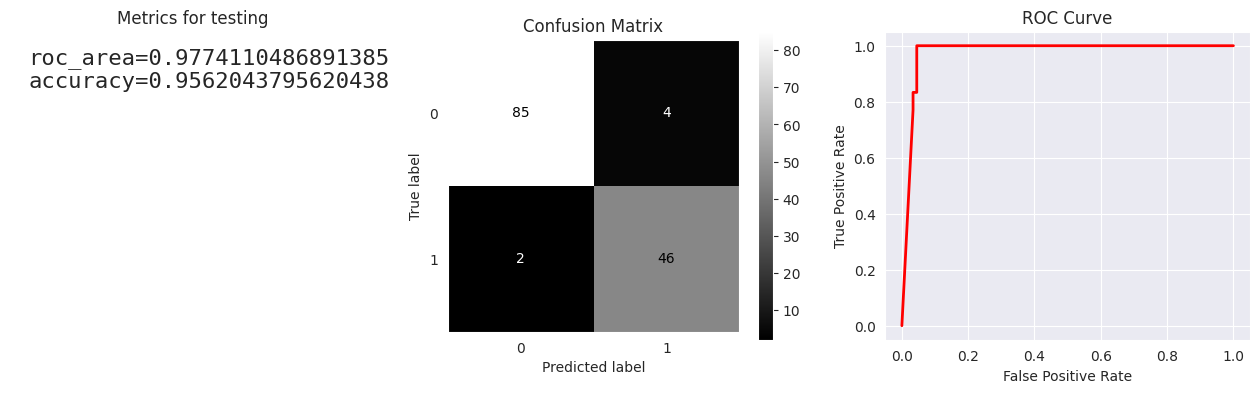

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif

def objective_knn(trial):
    ## Features Selector
    selector_k = trial.suggest_int('features_selector__k', 1, 9)

    ## Classifier
    n_neighbors = trial.suggest_int("classifier__n_neighbors", 1, 80)
    weights = trial.suggest_categorical('classifier__weights', ['uniform', 'distance'])
    metric  = trial.suggest_categorical('classifier__metric', ['manhattan', 'euclidean','minkowski'])


    pipe = Pipeline([('scaler', StandardScaler()),('features_selector', SelectKBest(k=selector_k, score_func=f_classif)) ,
                     ('classifier', KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric))])
    pipe.fit(x_train, y_train)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(pipe, x_train, y_train, cv=cv, scoring= 'neg_mean_squared_error').mean()

    return score

knn_model = optimize_train_and_judge(KNeighborsClassifier, objective_knn, trails=10)

# McNemar test for classifier prediction

In [83]:
knn_preds =knn_model.predict(x_test)
logit_preds = logistic_model.predict(x_test)

a = np.sum((knn_preds == 1) & (logit_preds == 1))
b = np.sum((knn_preds == 1) & (logit_preds == 0))
c = np.sum((knn_preds == 0) & (logit_preds == 1))
d = np.sum((knn_preds == 0) & (logit_preds == 0))

agreement_table = np.array([[a,b],[c,d]])
agreement_table

array([[50,  0],
       [ 1, 86]])

In [86]:
from statsmodels.stats.contingency_tables import mcnemar

result = mcnemar(agreement_table, exact=True)

print(f"stattistic: {result.statistic}")
print(f"pvalue: {result.pvalue}")

stattistic: 0.0
pvalue: 1.0
